In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import talib
import csv
from statistics import mean
from talib import RSI, BBANDS
import numpy as np

In [68]:
def analyzeTrades(ticker, data, smaLow, smaHigh):

    dates = []
    returns = []
    avgGains = []

    buyPoint = 0
    startingCapital = 5000
    cash = startingCapital

    sharesHeld = 0
    amountInStocks = 0

    prevSignal = 0

    for row in data.iterrows():

        signal = row[-1][-1]
        close = float(row[1][4])

        if signal == 1 and (prevSignal == 0 or prevSignal == -1): 

            sharesHeld = cash // close
            amountHeld = close * sharesHeld
            cash = cash - amountHeld

            buyPoint = close

            #print('BUY', str(row[0])[0 : 10], '(' + str(close) + ')', sharesHeld, close * sharesHeld, cash)
            #print()

            prevSignal = 1

        if signal == -1 and prevSignal == 1:

            cash += sharesHeld * close

            avgGains.append((close - buyPoint) / buyPoint * 100)

            #print('SELL', str(row[0])[0 : 10], '(' + str(close) + ')', sharesHeld, sharesHeld * close, cash)
            #print()

            sharesHeld = 0
            prevSignal = 0
            buyPoint = 0


        returns.append((sharesHeld * close) + cash)
        dates.append(row[0])
    
    
    plt.plot(returns)
    
    print()
    print(ticker)
    print('SMA', smaLow, smaHigh)
    
    avgGain = mean(avgGains)
    
    print('\nAvg Gain', round(avgGain, 2))

    posCount = len(list(filter(lambda x: (x >= 0), avgGains)))
    negCount = len(list(filter(lambda x: (x < 0), avgGains))) 
    
    print('Positive Trades: {0}  Negative Trades: {1}'.format(posCount, negCount))
    
    print('\nAvg Positive Trade:', round(mean(list(filter(lambda x: (x > 0), avgGains))), 2))
    print('Avg Negative Trade:', round(mean(list(filter(lambda x: (x < 0), avgGains))), 2))

    stockReturn = (data['Adj Close'][-1] - data['Adj Close'][0]) / data['Adj Close'][0] * 100
    stratReturn = (returns[-1] - startingCapital) / startingCapital * 100

    print('\nStrategy Return: {0}  Stock Return: {1}'.format(round(stratReturn, 2), round(stockReturn, 2)))
    
    print('\n\n')
    
    return ((abs(stratReturn) - abs(stockReturn)) * ((posCount / negCount) * 10) * avgGain) / 100
    

[*********************100%***********************]  1 of 1 downloaded

TSLA
SMA 3 4

Avg Gain 1.5
Positive Trades: 50  Negative Trades: 61

Avg Positive Trade: 8.66
Avg Negative Trade: -4.37

Strategy Return: 222.55  Stock Return: 845.94



[*********************100%***********************]  1 of 1 downloaded

TSLA
SMA 3 5

Avg Gain 1.06
Positive Trades: 38  Negative Trades: 52

Avg Positive Trade: 9.54
Avg Negative Trade: -5.14

Strategy Return: 66.52  Stock Return: 845.94



[*********************100%***********************]  1 of 1 downloaded

TSLA
SMA 3 6

Avg Gain 1.56
Positive Trades: 28  Negative Trades: 47

Avg Positive Trade: 12.01
Avg Negative Trade: -4.66

Strategy Return: 109.12  Stock Return: 845.94



[*********************100%***********************]  1 of 1 downloaded

TSLA
SMA 3 7

Avg Gain 2.13
Positive Trades: 23  Negative Trades: 44

Avg Positive Trade: 16.03
Avg Negative Trade: -5.14

Strategy Return: 130.57  Stock Return: 845.94



[*********************100%******

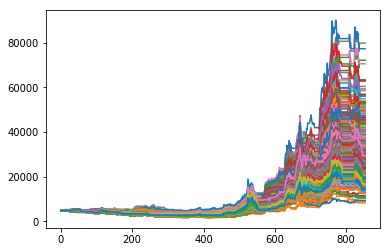

In [69]:
symbol = 'TSLA'

startDate = '2018-01-02'
endDate = '2021-05-25'

stratScores = []

for x in range(3, 25):
    
    for y in range(x + 1, 35):
        
        data = yf.download(tickers=symbol, start=startDate, end=endDate)

        data = data.dropna()

        data['SMAFast'] = data.iloc[:,1].rolling(window=x).mean()
        data['SMASlow'] = data.iloc[:,1].rolling(window=y).mean()

        data['signal'] = 0
        data.loc[(data.SMAFast > data.SMASlow), 'signal'] = 1
        data.loc[(data.SMAFast < data.SMASlow), 'signal'] = -1

        stratScore = analyzeTrades(symbol, data, x, y)
        
        stratScores.append([[x, y], stratScore])

In [70]:
sorted(stratScores, key = lambda l: l[1], reverse = True)

[[[9, 16], 1248.5542666010888],
 [[10, 15], 909.1887452624604],
 [[8, 16], 866.1496593350539],
 [[9, 15], 692.7848690550225],
 [[7, 17], 505.43553765878823],
 [[5, 32], 492.9905634360459],
 [[9, 14], 400.13743907094323],
 [[7, 16], 338.41185538877636],
 [[8, 17], 324.3472793933052],
 [[11, 14], 311.9502225013373],
 [[8, 15], 308.2576391129254],
 [[10, 14], 249.37572681751072],
 [[12, 13], 239.5443973992165],
 [[7, 15], 222.02526403785043],
 [[12, 14], 213.07312279730925],
 [[9, 19], 208.76506353574024],
 [[10, 17], 188.00856917735146],
 [[5, 33], 187.19527016254762],
 [[9, 18], 178.67035468251146],
 [[8, 18], 165.07897649676497],
 [[9, 17], 162.27966552118497],
 [[11, 15], 143.95028488132215],
 [[10, 16], 132.39621431880943],
 [[8, 14], 114.95674346671137],
 [[8, 13], 103.44573058977046],
 [[6, 12], 98.93518916431593],
 [[8, 19], 76.90066968416663],
 [[9, 20], 75.35641702960922],
 [[7, 14], 58.79491531807762],
 [[7, 10], 57.59257723353269],
 [[11, 13], 47.66860790491974],
 [[6, 13], 26